In [27]:
#%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings



C:\Users\HP\AppData\Local\Temp\ipykernel_776\4059212745.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  smoke_charge_box.set_xticklabels(new_labels)


0.8410037679926488

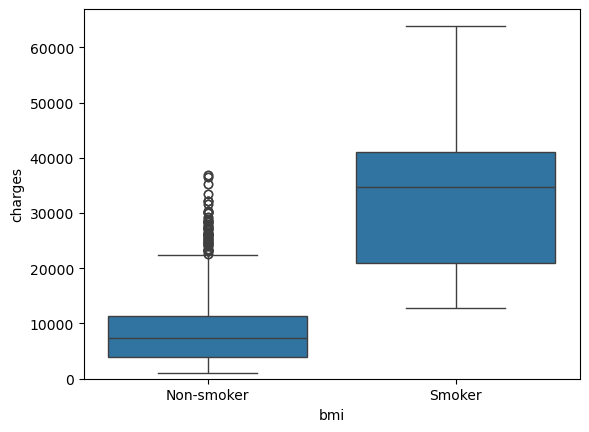

In [48]:
path='D:/NPower Manitoba/7.Data ANalysis with Python/Activity-project/medical_insurance_dataset.csv'

df=pd.read_csv(path,header=None)

df.columns=["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.replace('?',np.nan,inplace=True)

df.head(10)

# find all the indexes where age is NaN so we can check if it's replaced later
age_nans = df[np.isnan(df["age"].astype(float))].index
# get the mean for age
age_mean = round(df["age"].astype(float).mean())
# replace the missing ages with the average
df["age"] = df["age"].replace(np.nan, age_mean)
# change age to int since it won't have decimal values 
df["age"] = df["age"].astype(int)
# check the missing values
df["age"].iloc[age_nans]


# find all the indexes where smoker is NaN so we can check if it's replaced later
smoke_nans = df[np.isnan(df["smoker"].astype(float))].index
# get the mode for smoker
smoke_mode = df["smoker"].value_counts().idxmax()
# replace the missing smoker values with the mode
df["smoker"] = df["smoker"].replace(np.nan, smoke_mode)
# change smoker to int since it won't have decimal values 
df["smoker"] = df["smoker"].astype(int)
# check the missing values
df["smoker"].iloc[smoke_nans]

df["charges"]=df["charges"].round(2)
df.head(10)


#EDA
#Implement the regression plot for charges with respect to bmi.
sns.regplot(x='bmi',y='charges',data=df,line_kws={"color":"red"})
plt.ylim(0,)

#Implement the box plot for charges with respect to smoker.

# plot the chart
smoke_charge_box = sns.boxplot(x="smoker", y="charges", data=df)
# get the current labels
x_labels = smoke_charge_box.get_xticklabels()
# change the current label if 1 to Smoker else to non-smoker
new_labels = ["Smoker" if label.get_text() == "1" else "Non-smoker" for label in x_labels]
# set the new labels to the chart
smoke_charge_box.set_xticklabels(new_labels)

df.corr()

# -1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables


#Model Development
#Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the  R2  score of this model.


lm=LinearRegression()
Y=df["charges"]
X=df[["smoker"]]
lm.fit(X,Y)
lm.score(X,Y)

Z=df.drop("charges",axis=1)
lm.fit(Z,Y)
lm.score(Z,Y)

# Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z, Y)
pipe.score(Z, Y)

# Model Refinement

#Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=0)

#Initialize a Ridge regressor that used hyperparameter  α=0.1 . Fit the model using training data data subset. Print the  R2  score for the testing data.
rm = Ridge(alpha=0.1)
rm.fit(x_train, y_train)
rm.score(x_test, y_test)


#Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the  R2  score for the testing subset.

pf=PolynomialFeatures(degree=2, include_bias=False)
x_train_poly=pf.fit_transform(x_train)
x_test_poly=pf.fit_transform(x_test)
rm.fit(x_train_poly, y_train)
rm.score(x_test_poly, y_test)